Extreme Gradient Boosting is a machine learning algorithm based on decision trees. It is an ensemble of decision trees each one correcting the weakness of its preceding tree until a condtion is met. 

In [61]:
#import modules and necessary dependencies
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [3]:
#read the csv file
df = pd.read_csv(os.path.join("AB_NYC_2019.csv"))
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#drop the columns that is not relevant
df.drop(["id", "name", "host_name","host_id","latitude", "longitude","neighbourhood","last_review"], axis=1, inplace=True)

In [5]:
#check for any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   room_type                       48895 non-null  object 
 2   price                           48895 non-null  int64  
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               38843 non-null  float64
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 3.0+ MB


In [6]:
#fill in the missing values with appropriate data type
df.fillna({"reviews_per_month":0}, inplace=True)

In [7]:
#get the features and the target
X=df[["reviews_per_month","neighbourhood_group","room_type","availability_365"]]

In [8]:
#convert strings into numbers and assign price as the target
X= pd.get_dummies(X)
y=df["price"].values.reshape(-1, 1)

In [9]:
#split the dataset into  80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.2, random_state=50)

In [10]:
#fit the StandardScaler model to the trainning datasets
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [11]:
#transform the datasets to fit the model
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [12]:
#build dmatrices form the scaled datasets
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_scaled)
dtest = xgb.DMatrix(X_test_scaled, label=y_test_scaled)

In [13]:
# Learn the mean from the training data
mean_train = np.mean(y_train_scaled)

# Get predictions on the test set
baseline_predictions = np.ones(y_test_scaled.shape) * mean_train

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, baseline_predictions))
print("Baseline RMSE: %f" % (rmse))

Baseline RMSE: 1.015919


In [14]:
#set the paramaters with default values
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight':1,
    'eta':.1,
    'subsample': 0.1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror'    
}

In [15]:
#add the evaluation metric root mean squared error
params['eval_metric'] = "rmse"

In [16]:
#set the max boosting rounds
num_boost_round = 100

In [17]:
#pass more parameters on top of the default parameters
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:1.10239
[1]	Test-rmse:1.07789
[2]	Test-rmse:1.05684
[3]	Test-rmse:1.04139
[4]	Test-rmse:1.03089
[5]	Test-rmse:1.01935
[6]	Test-rmse:1.00983
[7]	Test-rmse:1.00283
[8]	Test-rmse:0.99742
[9]	Test-rmse:0.99332
[10]	Test-rmse:0.98888
[11]	Test-rmse:0.98461
[12]	Test-rmse:0.98171
[13]	Test-rmse:0.98157
[14]	Test-rmse:0.97961
[15]	Test-rmse:0.97977
[16]	Test-rmse:0.97936
[17]	Test-rmse:0.97880
[18]	Test-rmse:0.97884
[19]	Test-rmse:0.97773
[20]	Test-rmse:0.97685
[21]	Test-rmse:0.97720
[22]	Test-rmse:0.97944
[23]	Test-rmse:0.97993
[24]	Test-rmse:0.97991
[25]	Test-rmse:0.97906
[26]	Test-rmse:0.97895
[27]	Test-rmse:0.97830
[28]	Test-rmse:0.97951
[29]	Test-rmse:0.98004


In [18]:
# get the best RMSE
print("Best RMSE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best RMSE: 0.98 with 21 rounds


In [19]:
#run cross validation on the training data to get the rmse score
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=3,
    metrics='rmse',
    early_stopping_rounds=10
)

cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.084826,0.044619,1.084678,0.085444
1,1.057099,0.046677,1.059277,0.087945
2,1.035078,0.048502,1.038019,0.089493
3,1.014891,0.048017,1.020956,0.090471
4,0.999425,0.048565,1.007977,0.090421
5,0.985340,0.049680,0.997204,0.091375
6,0.975226,0.050072,0.988151,0.094187
7,0.966028,0.049884,0.981159,0.093880
8,0.958085,0.050496,0.975364,0.094856
9,0.952387,0.050978,0.969424,0.095346


In [20]:
#get the min rmse score
cv_results['test-rmse-mean'].min()

0.9523963333333333

In [21]:
#set the range of max_depth and min_child_weight
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(1,10)
    for min_child_weight in range(1,10)
]

In [22]:
%%time

#set the initial best params and RMSE
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=3,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {},RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=1, min_child_weight=1
	RMSE 0.9440576666666667 for 64 rounds
CV with max_depth=1, min_child_weight=2
	RMSE 0.9440576666666667 for 64 rounds
CV with max_depth=1, min_child_weight=3
	RMSE 0.9440576666666667 for 64 rounds
CV with max_depth=1, min_child_weight=4
	RMSE 0.9440576666666667 for 64 rounds
CV with max_depth=1, min_child_weight=5
	RMSE 0.9440576666666667 for 64 rounds
CV with max_depth=1, min_child_weight=6
	RMSE 0.9440576666666667 for 64 rounds
CV with max_depth=1, min_child_weight=7
	RMSE 0.9440576666666667 for 64 rounds
CV with max_depth=1, min_child_weight=8
	RMSE 0.9440576666666667 for 64 rounds
CV with max_depth=1, min_child_weight=9
	RMSE 0.9440576666666667 for 64 rounds
CV with max_depth=2, min_child_weight=1
	RMSE 0.9407883333333334 for 44 rounds
CV with max_depth=2, min_child_weight=2
	RMSE 0.9408626666666665 for 44 rounds
CV with max_depth=2, min_child_weight=3
	RMSE 0.9409236666666666 for 44 rounds
CV with max_depth=2, min_child_weight=4
	RMSE 0.9407

In [35]:
#update the params
params['max_depth'] = 4
params['min_child_weight'] =9

In [36]:
#set the range for subsample and colsample
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(1,10)]
    for colsample in [i/10. for i in range(1,10)]
]

In [37]:
%%time

#set the initial best params and RMSE
min_rmse = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=3,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with subsample=0.9, colsample=0.9
	RMSE 0.937576 for 46 rounds
CV with subsample=0.9, colsample=0.8
	RMSE 0.9374096666666666 for 48 rounds
CV with subsample=0.9, colsample=0.7
	RMSE 0.9380623333333333 for 45 rounds
CV with subsample=0.9, colsample=0.6
	RMSE 0.9380259999999999 for 56 rounds
CV with subsample=0.9, colsample=0.5
	RMSE 0.9382886666666667 for 57 rounds
CV with subsample=0.9, colsample=0.4
	RMSE 0.938952 for 57 rounds
CV with subsample=0.9, colsample=0.3
	RMSE 0.9399376666666667 for 58 rounds
CV with subsample=0.9, colsample=0.2
	RMSE 0.9421376666666665 for 58 rounds
CV with subsample=0.9, colsample=0.1
	RMSE 0.949761 for 58 rounds
CV with subsample=0.8, colsample=0.9
	RMSE 0.93805 for 41 rounds
CV with subsample=0.8, colsample=0.8
	RMSE 0.9383603333333332 for 41 rounds
CV with subsample=0.8, colsample=0.7
	RMSE 0.9386536666666666 for 41 rounds
CV with subsample=0.8, colsample=0.6
	RMSE 0.9381433333333332 for 51 rounds
CV with subsample=0.8, colsample=0.5
	RMSE 0.93830033

In [67]:
#update the params
params['subsample'] = 0.9
params['colsample_bytree'] = 0.8

In [62]:
%%time

#set the initial best params and RMSE
min_rmse = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=3,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

CV with eta=0.3
	RMSE 0.9392800000000001 for 13 rounds
CV with eta=0.2
	RMSE 0.938056 for 21 rounds
CV with eta=0.1
	RMSE 0.9374096666666666 for 48 rounds
CV with eta=0.05
	RMSE 0.9388503333333333 for 58 rounds
CV with eta=0.01
	RMSE 0.9983753333333333 for 58 rounds
CV with eta=0.005
	RMSE 1.0419886666666667 for 58 rounds
Best params: 0.1, RMSE: 0.9374096666666666
Wall time: 11.4 s


In [68]:
#update the params
params["eta"] = 0.1

In [73]:
#check the params
params

{'max_depth': 4,
 'min_child_weight': 9,
 'eta': 0.1,
 'subsample': 0.9,
 'colsample_bytree': 0.8,
 'objective': 'reg:squarederror',
 'eval_metric': 'rmse'}

In [87]:
#train the model with updated params
model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10,   
)

[0]	Test-rmse:1.10287
[1]	Test-rmse:1.07814
[2]	Test-rmse:1.05828
[3]	Test-rmse:1.04134
[4]	Test-rmse:1.02725
[5]	Test-rmse:1.01619
[6]	Test-rmse:1.00821
[7]	Test-rmse:1.00057
[8]	Test-rmse:0.99427
[9]	Test-rmse:0.98904
[10]	Test-rmse:0.98474
[11]	Test-rmse:0.98133
[12]	Test-rmse:0.97865
[13]	Test-rmse:0.97626
[14]	Test-rmse:0.97458
[15]	Test-rmse:0.97298
[16]	Test-rmse:0.97193
[17]	Test-rmse:0.97096
[18]	Test-rmse:0.97003
[19]	Test-rmse:0.96936
[20]	Test-rmse:0.96874
[21]	Test-rmse:0.96835
[22]	Test-rmse:0.96797
[23]	Test-rmse:0.96761
[24]	Test-rmse:0.96739
[25]	Test-rmse:0.96706
[26]	Test-rmse:0.96682
[27]	Test-rmse:0.96670
[28]	Test-rmse:0.96689
[29]	Test-rmse:0.96686
[30]	Test-rmse:0.96704
[31]	Test-rmse:0.96712
[32]	Test-rmse:0.96702
[33]	Test-rmse:0.96697
[34]	Test-rmse:0.96690
[35]	Test-rmse:0.96685
[36]	Test-rmse:0.96683


In [89]:
#get the RMSE score
print("Best RMSE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

Best RMSE: 0.97 in 28 rounds


In [90]:
#set the num_boost_round and remove early_Stop
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[0]	Test-rmse:1.10287
[1]	Test-rmse:1.07814
[2]	Test-rmse:1.05828
[3]	Test-rmse:1.04134
[4]	Test-rmse:1.02725
[5]	Test-rmse:1.01619
[6]	Test-rmse:1.00821
[7]	Test-rmse:1.00057
[8]	Test-rmse:0.99427
[9]	Test-rmse:0.98904
[10]	Test-rmse:0.98474
[11]	Test-rmse:0.98133
[12]	Test-rmse:0.97865
[13]	Test-rmse:0.97626
[14]	Test-rmse:0.97458
[15]	Test-rmse:0.97298
[16]	Test-rmse:0.97193
[17]	Test-rmse:0.97096
[18]	Test-rmse:0.97003
[19]	Test-rmse:0.96936
[20]	Test-rmse:0.96874
[21]	Test-rmse:0.96835
[22]	Test-rmse:0.96797
[23]	Test-rmse:0.96761
[24]	Test-rmse:0.96739
[25]	Test-rmse:0.96706
[26]	Test-rmse:0.96682
[27]	Test-rmse:0.96670


In [91]:
#check the test dataset
np.sqrt(mean_squared_error(best_model.predict(dtest), y_test_scaled))

0.9667032575147353

In [46]:
#save the model
best_model.save_model("my_model.model")

In [48]:
#load the model
loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")

y_test_pred =loaded_model.predict(dtest)
print(f'true = {np.array(y_test_scaled)}')
print(f'pred = {y_test_pred}')


true = [[-0.34549911]
 [-0.35803124]
 [ 1.45077269]
 ...
 [-0.22853258]
 [ 1.03303506]
 [-0.17840406]]
pred = [-0.34362954 -0.37223992  0.11119199 ...  0.10054485  0.44447485
 -0.24261296]


In [50]:
#check the r2 score
from sklearn.metrics import r2_score

print(r2_score(y_test_scaled,y_test_pred))

0.0951795046324746


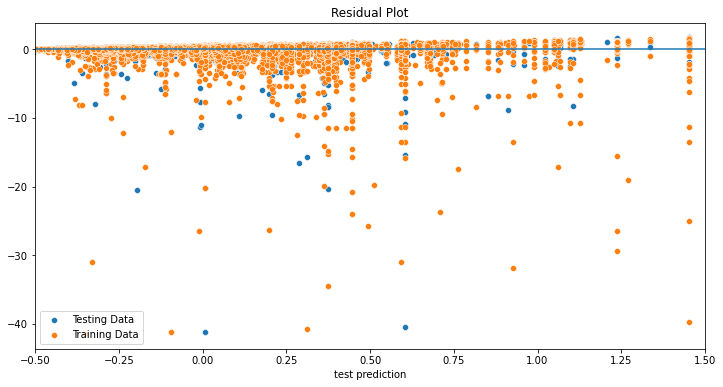

In [94]:
#plot the residual 
y_train_pred = loaded_model.predict(dtrain)
test = pd.DataFrame({"test prediction": y_test_pred, "test": y_test_scaled.flatten()})
train =pd.DataFrame({"train prediction": y_train_pred, "train": y_train_scaled.flatten()})


fig1 = plt.figure(figsize=(12, 6))

sns.scatterplot(data = test, x=test["test prediction"], y=test["test prediction"] - test["test"], label="Testing Data")
sns.scatterplot(data = train, x=train["train prediction"], y=train["train prediction"] - train["train"], label="Training Data")


#plt.legend()
plt.hlines(y=0, xmin=test["test"].min(), xmax=test["test"].max())
plt.xlim([-0.5, 1.50])
#plt.ylim([-0.5, 0.5])


plt.title("Residual Plot")
plt.show()

In [95]:
fig1.savefig("Graphs/XGBoost_StandardScaler_Comparison.png")

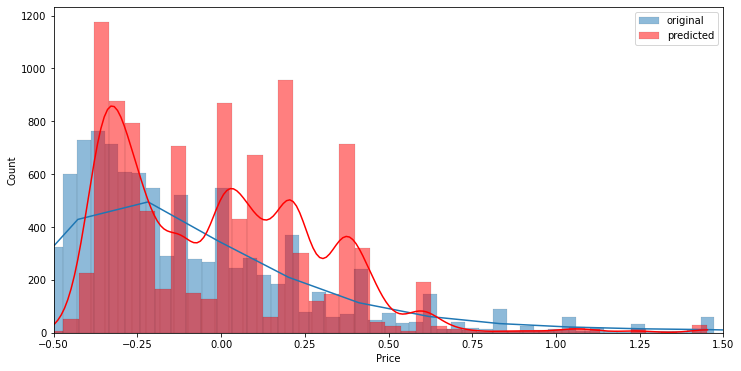

In [96]:
#check to see the prediction
fig2 = plt.figure(figsize=(12, 6))

sns.histplot( y_test_scaled, color="blue", label="original", kde= True)
sns.histplot(y_test_pred, color="red", label="predicted", kde=True)

plt.xlim([-0.5, 1.50])

plt.xlabel("Price")
plt.legend()


In [97]:
fig2.savefig("Graphs/XGBoost_StandardScaler_Comparison2.png")